In [9]:
import lmdb
import matplotlib.pyplot as plt
import pickle
import tifffile
import os
from train_DA import Trainer
from config_manager import TrainDAConfiguration
import tensorflow as tf
from utils.data import get_gt_as_numpy

This is showing final predictions

In [11]:
import json
domain = "SST"
dataset = "test"

lmdb_dir = "/home/amarinai/DeepLearningThesis/Results/Unet_DA_lowloss/"+ domain+"_"+dataset+"_pred_lmdb"
lmdb_dir_1 = "/home/amarinai/DeepLearningThesis/Results/Unet_DA_lowloss_002/"+ domain+"_"+dataset+"_pred_lmdb"
data = lmdb.open(lmdb_dir, readonly=True)
data_dir = "/home/amarinai/Data/"+ domain+"/Tiff_files/"+dataset.capitalize()
gt_dir = "/home/amarinai/Data/"+ domain+"/GT_files/"+dataset.capitalize()
data1 = lmdb.open(lmdb_dir_1, readonly=True)

#print(json.loads("/home/amarinai/DeepLearningThesis/Results/Unet_DA_lowloss/DoG_checkpoints/BlobDoG_parameters.json"))
#print(json.loads("/home/amarinai/DeepLearningThesis/Results/Unet_DA_lowloss_002/DoG_checkpoints/BlobDoG_parameters.json"))

"""
fx1 = data1.begin()
Y1 = fx1.cursor()
Y1 = Y1.iternext()
"""
fx = data.begin()
Y = fx.cursor()
Y = Y.iternext()


InvalidParameterError: mdb_txn_begin: Invalid argument

In [34]:
s=fx1.get("sub_0640_09600_01920__1153_0091_05564.tif".encode())
s.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [12]:
domain = "SST"
dataset = "val"

lmdb_dir_1 = "/home/amarinai/DeepLearningThesis/Results/Unet_DA_slice_first_exp/Broca_new_test_pred_lmdb"
data = lmdb.open(lmdb_dir_1, readonly=True)

fx1 = data.begin()
Y1 = fx1.cursor()
Y1 = Y1.iternext()

In [11]:
from models import ResUNet_DA

unet = ResUNet_DA(
                n_blocks=4,
                n_filters=16,
                k_size=[3, 3, 3],
                k_stride=[2, 2, 2],
                dropout=None,
                regularizer=None,
                lambda_da=0.0,
            )

2024-09-02 11:10:42.045971: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 39067 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:31:00.0, compute capability: 8.6
2024-09-02 11:10:42.046490: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38381 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:ca:00.0, compute capability: 8.6


In [24]:
checkpoint_path = "/home/amarinai/DeepLearningThesis/Results/Unet_DA_slice_first_exp/UNet_checkpoints/saved_model6000/model.tf"
unet.load_weights(checkpoint_path)

NameError: name 'unet' is not defined

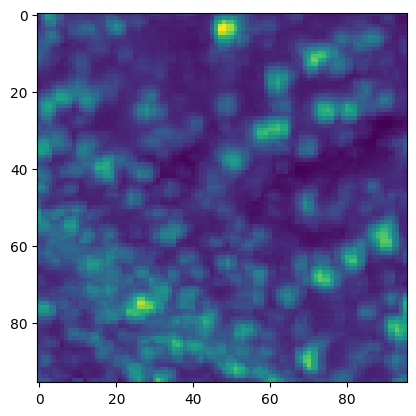

In [5]:
path = "/home/amarinai/Data/Broca_I45_95crops/Tiff_files/Test/I45_slice_10_pos_48_6427_4639_dim_50_100_100.tiff"
img = tifffile.imread(path)


img[img>2**15] = 2**15
img = img/2**15
img = img[:48, :96, :96]
plt.imshow(img.max(0))

pred, _ = unet(img[None, ..., None])
pred = tf.sigmoid(tf.squeeze(pred)).numpy()


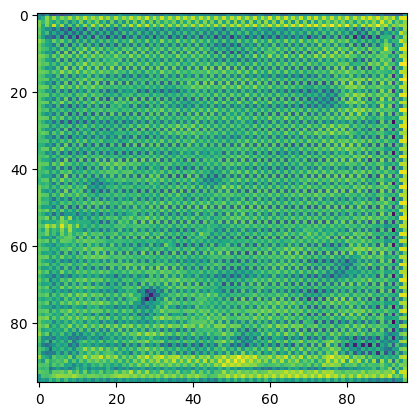

: 

In [28]:
plt.imshow(pred.max(0))


In [ ]:
lmdb_dir_1 = "/home/amarinai/DeepLearningThesis/Results/Unet_DA_slice_first_exp/Broca_new_test_pred_lmdb"
data = lmdb.open(lmdb_dir_1, readonly=True)

fx1 = data.begin()
Y1 = fx1.cursor()
Y1 = Y1.iternext()

In [18]:
key,  y = next(Y1)
y = pickle.loads(y)
plt.imshow(y.max(0), vmin=0, vmax=255)

StopIteration: 

Visualize an image and its augmentation


In [87]:
path = "/home/amarinai/Data/SST/Tiff_files/Train/sub_0320_10080_16320__0280_0102_04885.tif"

tf.Tensor(0.03950870010235415, shape=(), dtype=float64) tf.Tensor(1.0, shape=(), dtype=float64)


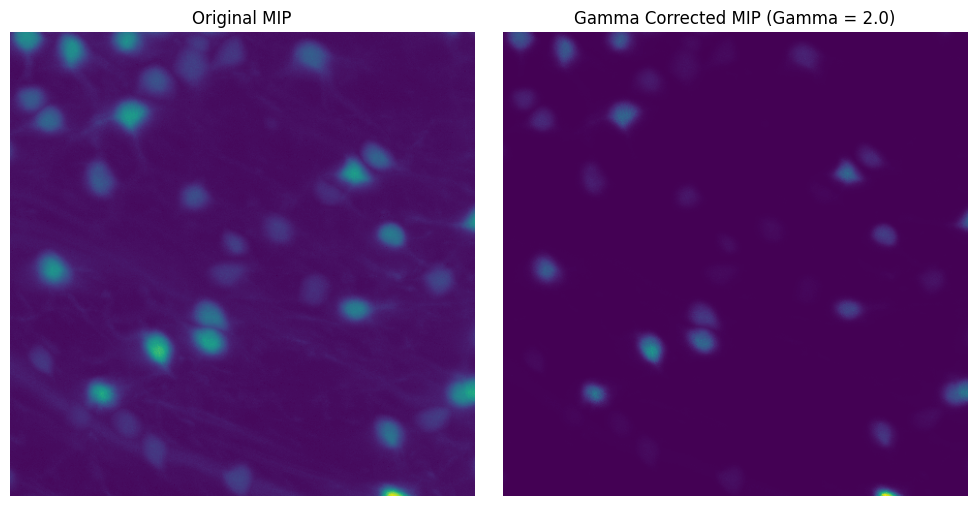

In [88]:
import tifffile
import matplotlib.pyplot as plt
import numpy as np

# Load the image

img = tifffile.imread(path)

# Cap the pixel values and normalize
img[img > 2**15] = 2**15
img = img / 2**15
img = img / np.max(img)

# Compute the Maximum Intensity Projection (MIP)
mip = img.max(0)

# Function to apply gamma correction
def apply_gamma_correction(image, gamma):
    # Normalize the image to the range [0, 1]
    normalized_img = image / np.max(image)
    # Apply gamma correction
    corrected_img = np.power(normalized_img, gamma)
    return corrected_img

def gamma_tf(input, gamma):
    x_min = tf.math.reduce_min(input)
    x_max = tf.math.reduce_max(input)
    print(x_min, x_max)
    x_range = x_max - x_min

    output = tf.math.pow((input - x_min) / x_range, gamma)
    return output

# Apply gamma correction with gamma = 2.0
mip_gamma_corrected = gamma_tf(mip, gamma=2)
mip_gamma_corrected = (mip_gamma_corrected - np.min(mip_gamma_corrected)) / np.max(mip_gamma_corrected) 

mip = (mip -np.min(mip)) / np.max(mip)
# Plot the original MIP and gamma-corrected MIP in subplots
plt.figure(figsize=(10, 5))

# Original MIP
plt.subplot(1, 2, 1)
plt.imshow(mip, vmin=0, vmax=1)
plt.title('Original MIP')
plt.axis('off')

# Gamma-corrected MIP
plt.subplot(1, 2, 2)
plt.imshow(mip_gamma_corrected, vmin=0, vmax=1)
plt.title('Gamma Corrected MIP (Gamma = 2.0)')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()


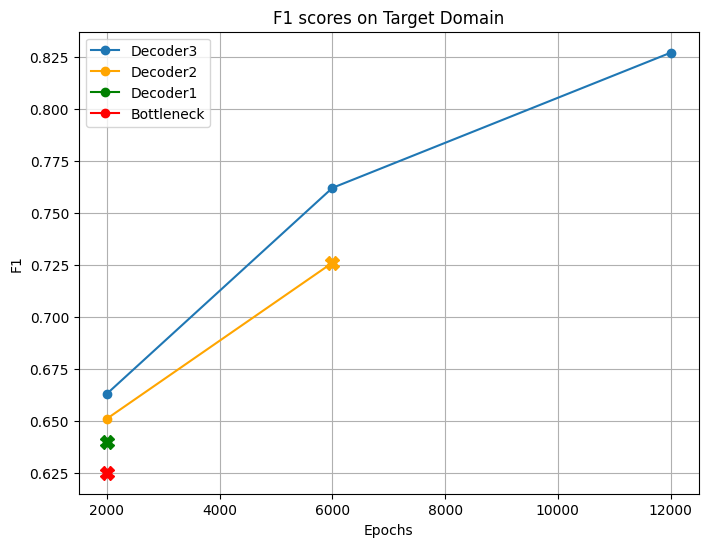

In [102]:
# Rewriting the code to properly add the killed 'X' markers
import matplotlib.pyplot as plt


epochs = [2000, 6000, 12000]
decoder3 = [0.663, 0.762, 0.827]
decoder2 = [0.651, 0.726, None]
decoder1 = [0.640, None, None]
bottleneck = [0.625, None, None]
plt.figure(figsize=(8, 6))

# Plot for each model with 'X' marker where process is killed
plt.plot(epochs, decoder3, marker='o', label='Decoder3')
plt.plot(epochs[:2], decoder2[:2], color="orange", marker='o', label='Decoder2')
plt.plot(epochs[:1], decoder1[:1], color="green", marker='o', label='Decoder1')
plt.plot(epochs[:1], bottleneck[:1], color="red", marker='o', label='Bottleneck')

# Adding 'X' where the process is killed (at corresponding epochs)
plt.plot(6000, decoder2[1], 'X', color='orange', markersize=10, label='_nolegend_')
plt.plot(2000, decoder1[0], 'X', color='green', markersize=10, label='_nolegend_')
plt.plot(2000, bottleneck[0], 'X', color='red', markersize=10, label='_nolegend_')

# Titles and labels
plt.title('F1 scores on Target Domain')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.legend()

# Display the plot
plt.grid(True)
plt.savefig("/home/amarinai/DeepLearningThesis/BCFind-v2/bcfind/plotttttt.png")

FileNotFoundError: [Errno 2] No such file or directory: '/home/amarinai/Data/SST/Tiff_files/Test/I45_slice_10_pos_115_7160_5864_dim_50_100_100.tiff'

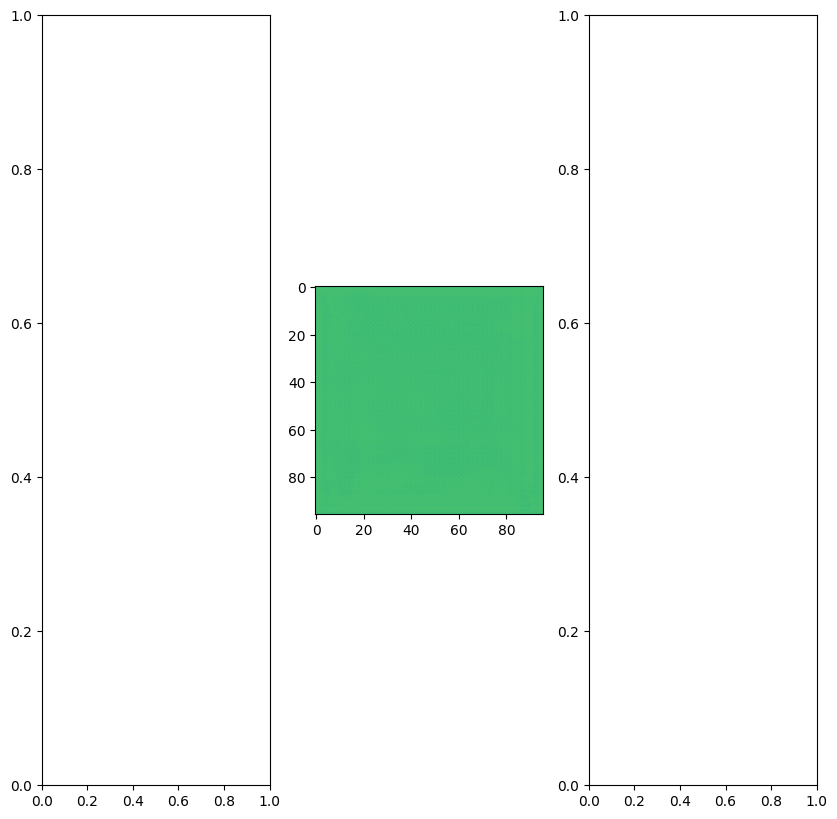

In [6]:
fig, axes = plt.subplots(1,3, figsize=(10,10))
"""key,  y = next(Y)
y = pickle.loads(y)
axes[0].imshow(y.max(0), vmin=0, vmax=255)
"""
key,  y = next(Y1)
y = pickle.loads(y)
axes[1].imshow(y.max(0), vmin=0, vmax=255)
x = tifffile.imread(f"{data_dir}/{key.decode()}")
axes[2].imshow(x.max(0))
print(x.shape)

a = f"{gt_dir}/{key.decode()}"
if domain == "SST":
    a = a.replace(".tif",".tif.marker")
if domain == "CFos":
    a = a.replace(".tiff",".tiff.marker")
a = a.replace("tif.markerf","tiff.marker")

print(a)
gt = get_gt_as_numpy(a)
print(gt.shape[0], "gt_points")

coordinates = gt[:, 1:]
axes[0].scatter(coordinates[:, 1], coordinates[:, 0], c='red', marker='o', s = 0.5)
axes[1].scatter(coordinates[:, 1], coordinates[:, 0], c='red', marker='o', s = 0.4)
axes[2].scatter(coordinates[:, 1], coordinates[:, 0], c='red', marker='o', s = 0.4)

This is using checkpoints results

In [28]:
import itertools
import tensorflow as tf


def predict(input, model):
    if tf.rank(input) == 3:
        input = input[tf.newaxis, ..., tf.newaxis]

    I, J = 8, 8
    for i, j in itertools.product(range(I), range(J)):
        if i == 0 and j == 0:
            x = tf.identity(input)
            continue
        try:
            print("Input shape =", x.shape)
            pred, _ = model(x, training=False)
            break
        except (tf.errors.InvalidArgumentError, ValueError) as e:
            print("Invalid input shape for concat layer. Extracting slice")
            x = tf.slice(
                input,
                [0, 0, 0, 0, 0],
                size=[
                    input.shape[0],
                    input.shape[1] - j,
                    input.shape[2] - i,
                    input.shape[3] - i,
                    input.shape[4],
                ],
            )

            if i == I - 1 and j == J - 1:
                raise e

    pred = tf.sigmoid(tf.squeeze(pred))
    return pred

In [44]:
from utils.models import predict
from utils.data import get_input_tf, get_gt_as_numpy
import numpy as np

def print_predictions(
        tiff_files, marker_files, data_shape, trainer, **preprocessing_kwargs
    ):  
        # UNet predictions
        i=0
        for tiff_file, marker_file in zip(tiff_files, marker_files):
            if i >= 1:
                break
            x = get_input_tf(tiff_file, **preprocessing_kwargs)

            pred = predict(x, trainer.unet).numpy()
            y = get_gt_as_numpy(marker_file)
            fig, axes = plt.subplots(len(tiff_files),2)
            print(x)
            
            print(y)
            
            axes[i, 0].imshow(tf.math.reduce_max(pred,0))
            axes[i, 1].imshow(tf.math.reduce_max(x,0))
            i+=1
            print(i)



Input shape = (1, 100, 300, 300, 1)
tf.Tensor(
[[[0.0071106  0.00665283 0.00585938 ... 0.00946045 0.00863647 0.01037598]
  [0.006073   0.00650024 0.00497437 ... 0.00900269 0.00961304 0.00933838]
  [0.00595093 0.00592041 0.00720215 ... 0.00738525 0.00872803 0.00823975]
  ...
  [0.00576782 0.00643921 0.00610352 ... 0.01019287 0.01107788 0.01119995]
  [0.00561523 0.00582886 0.00656128 ... 0.0105896  0.01062012 0.01092529]
  [0.00582886 0.00643921 0.0065918  ... 0.01123047 0.01147461 0.01065063]]

 [[0.00698853 0.0067749  0.00598145 ... 0.00875854 0.00839233 0.0093689 ]
  [0.00595093 0.00643921 0.00668335 ... 0.00857544 0.00808716 0.00930786]
  [0.00723267 0.00662231 0.00646973 ... 0.00799561 0.00735474 0.00823975]
  ...
  [0.00534058 0.00619507 0.00570679 ... 0.01159668 0.0105896  0.01086426]
  [0.0055542  0.00604248 0.00637817 ... 0.01153564 0.01126099 0.01300049]
  [0.00561523 0.00610352 0.00616455 ... 0.01132202 0.01065063 0.00952148]]

 [[0.00653076 0.00708008 0.00662231 ... 0.0073852

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

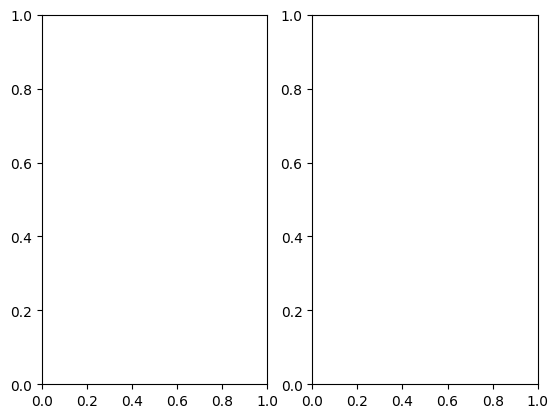

: 

In [45]:
from train_DA import get_inputs_target_paths

model_path = "/home/amarinai/DeepLearningThesis/Results/Unet_DA_long/UNet_checkpoints/saved_model9000/model.tf"
trainer = Trainer()
config_file = "/home/amarinai/DeepLearningThesis/Results/Unet_DA_long/train_config_DA.yaml"
conf = TrainDAConfiguration(config_file)
trainer.build_unet(
                        n_blocks=conf.unet.n_blocks,
                        n_filters=conf.unet.n_filters,
                        k_size=conf.unet.k_size,
                        k_stride=conf.unet.k_stride,
                        dropout=conf.unet.dropout,
                        regularizer=conf.unet.regularizer,
                        model_type=conf.unet.model,
                        lambda_da=conf.unet.lambda_da,
                        squeeze_factor=conf.unet.squeeze_factor,
                        moe_n_experts=conf.unet.moe_n_experts,
                        moe_top_k_experts=conf.unet.moe_top_k_experts,
                        moe_noise=conf.unet.moe_noise,
                        moe_balance_loss=conf.unet.moe_balance_loss,
                    )

trainer.unet.load_weights(model_path).expect_partial()

test_on_target  = False
if not test_on_target:
            data_conf = conf.source
else:
            data_conf = conf.target
test_tiff_files, test_marker_files = get_inputs_target_paths(
            data_conf.test_tif_dir, data_conf.test_gt_dir
        )
data_dir = "/home/amarinai/Data/CFos/Tiff_files/Test"
fnames = os.listdir(data_dir)
print_predictions(
            tiff_files=test_tiff_files,
            marker_files=test_marker_files,
            data_shape=data_conf.shape,
            trainer=trainer,
            **conf.preproc,
        )




